# Figure 3 - Integrative analysis of RNA-seq and ATAC-seq

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/macrophage-regulation/src"

[1] "/home/sreichl/projects/macrophage-regulation"

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

In [3]:
library(EnhancedVolcano, quietly=TRUE)
library("ggrastr")

# configs

In [4]:
# configs
data_path <- file.path('results','INT')
results_path <- file.path('results','figures','figure_3')

LFC_filter <- 1
AveExpr_filter <- 1
adjp_filter <- 0.05

# time-series
timeseries_k <- read.csv(file=file.path('config','BMDM_timeseries_k.csv'), row.names=1, header=TRUE)

# enrichment analysis
timeseries_enrichment_terms <- read.csv(file=file.path('config','BMDM_timeseries_enrichment_terms.csv'), row.names=1, header=TRUE)

In [6]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# Load data

In [7]:
# load annotations
annot <- read.csv(file=file.path(data_path,'INT_annotations.csv'), row.names=1)
dim(annot)
head(annot)

[1] 142   5

,library,treatment,time,experiment,group
,<chr>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,Quant-seq,C_albicans,2h,PT76,C_albicans_2h
RNA_PT82_R1_C_albicans_24h,Quant-seq,C_albicans,24h,PT82,C_albicans_24h
RNA_PT76_R1_C_albicans_4h,Quant-seq,C_albicans,4h,PT76,C_albicans_4h
RNA_PT76_R1_C_albicans_6h,Quant-seq,C_albicans,6h,PT76,C_albicans_6h
RNA_PT82_R1_C_albicans_8h,Quant-seq,C_albicans,8h,PT82,C_albicans_8h
RNA_PT76_R1_untreated_0h,Quant-seq,untreated,0h,PT76,untreated_0h


In [8]:
# load gene annotations
annot_genes <- read.csv(file=file.path('results','RNA','counts', "gene_annotation.tsv"), sep='\t', row.names=1)
dim(annot_genes)
head(annot_genes)

[1] 55487     8

,version,source,external_gene_name,external_gene_source,description,gene_biotype,length,gc
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
ENSMUSG00000000194,13,ensembl_havana,Gpr107,MGI Symbol,G protein-coupled receptor 107 [Source:MGI Symbol;Acc:MGI:2139054],protein_coding,12766,0.4945950
ENSMUSG00000000247,11,ensembl_havana,Lhx2,MGI Symbol,LIM homeobox protein 2 [Source:MGI Symbol;Acc:MGI:96785],protein_coding,4393,0.5970863
ENSMUSG00000000544,14,ensembl_havana,Gpa33,MGI Symbol,glycoprotein A33 (transmembrane) [Source:MGI Symbol;Acc:MGI:1891703],protein_coding,2742,0.5309993
ENSMUSG00000000817,10,ensembl_havana,Fasl,MGI Symbol,"Fas ligand (TNF superfamily, member 6) [Source:MGI Symbol;Acc:MGI:99255]",protein_coding,1937,0.4305627
ENSMUSG00000000889,8,ensembl_havana,Dbh,MGI Symbol,dopamine beta hydroxylase [Source:MGI Symbol;Acc:MGI:94864],protein_coding,2692,0.5549777
ENSMUSG00000001138,13,ensembl_havana,Cnnm3,MGI Symbol,cyclin M3 [Source:MGI Symbol;Acc:MGI:2151055],protein_coding,6420,0.5610592


In [9]:
# load data
data <- read.csv(file=file.path(data_path,'INT_norm_batchCorrected.csv'), row.names=1)
dim(data)
head(data)

[1] 45069   142

,RNA_PT76_R1_C_albicans_2h,RNA_PT82_R1_C_albicans_24h,RNA_PT76_R1_C_albicans_4h,RNA_PT76_R1_C_albicans_6h,RNA_PT82_R1_C_albicans_8h,RNA_PT76_R1_untreated_0h,RNA_PT82_R1_untreated_24h,RNA_PT76_R1_IFN_beta_2h,RNA_PT82_R1_IFN_beta_24h,RNA_PT76_R1_IFN_beta_4h,⋯,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000098104,1.405811,2.827185,-0.7344103,2.015832,1.521031,3.228688,2.443284,2.954642,2.672776,-0.7365572,⋯,2.264365,1.603131,1.746338,2.408978,4.287098,2.401559,1.770998,2.254504,2.257990,1.865165
ENSMUSG00000033845,6.087384,6.123522,6.2594799,5.883915,6.154641,6.080316,6.096749,6.199833,5.787196,5.9959065,⋯,5.844907,5.454590,6.053874,5.719627,4.401719,6.243460,5.413775,6.492471,5.652902,5.521632
ENSMUSG00000025903,5.435192,5.343274,5.5866605,5.477830,5.306164,5.720310,5.474042,5.958396,5.553141,5.8954757,⋯,6.012205,5.787282,6.043073,6.040258,6.120597,5.372314,6.189717,5.049843,5.738152,5.618413
ENSMUSG00000033813,4.858575,4.733815,4.6249625,5.058409,4.792464,4.719336,4.838214,4.948055,5.124871,5.7984825,⋯,4.993532,4.982980,5.053641,5.113319,4.966217,4.844944,4.757180,4.834565,5.186421,5.191404
ENSMUSG00000033793,6.449895,6.132281,6.7044679,6.296670,6.653410,6.073398,6.311933,6.476513,6.349170,6.3236133,⋯,5.011635,5.826719,6.776081,6.321676,6.470296,6.210140,5.961353,5.999122,6.177158,6.482480
ENSMUSG00000025907,6.392849,6.626331,6.3776922,6.415400,6.320045,6.421428,6.538384,6.015843,6.817085,6.0667091,⋯,7.103102,6.614379,6.596467,6.889029,6.439346,6.760602,6.438620,6.152258,6.992512,7.036765


In [10]:
# load DEA results
dea_results <-  read.csv(file=file.path(data_path,'DEA','INT_DEA_all.csv'))
dim(dea_results)
head(dea_results)

[1] 1397139      10

,rn,logFC,AveExpr,t,P.Value,adj.P.Val,B,time,treatment,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,ENSMUSG00000074141,3.2480017,3.7435293,8.102705,3.703750e-12,8.346216e-08,16.70740,24h,C_albicans,C_albicans_24h
2,ENSMUSG00000108227,3.2007473,2.4458418,8.204313,2.315435e-12,8.346216e-08,16.54095,24h,C_albicans,C_albicans_24h
3,ENSMUSG00000039699,2.0420182,5.9732862,7.750445,1.878408e-11,2.821932e-07,15.48835,24h,C_albicans,C_albicans_24h
4,ENSMUSG00000032883,-1.3106106,5.3624098,-7.620933,3.404211e-11,3.835610e-07,15.18263,24h,C_albicans,C_albicans_24h
5,ENSMUSG00000079184,-0.8536463,6.9781679,-7.369471,1.075002e-10,8.074875e-07,14.11205,24h,C_albicans,C_albicans_24h
6,ENSMUSG00000095574,-1.8943035,-0.6882451,-7.407370,9.043323e-11,8.074875e-07,13.62366,24h,C_albicans,C_albicans_24h


In [11]:
# set treatment colors
# treatment_colors <- setNames(object = hue_pal()(length(unique(annot$treatment))),nm = unique(annot$treatment))
# treatment_colors <- treatment_colors[order(names(treatment_colors))]
# names(treatment_colors) <- str_replace(names(treatment_colors), '_', ' ')
# treatment_colors <- treatment_colors[c("untreated", names(treatment_colors)[names(treatment_colors) != "untreated"])]
treatment_colors

untreated C albicans   IFN beta  IFN gamma  LCMV Cl13       LO28        LPS 
 "#707070"  "#0072B2"  "#D55E00"  "#E69F00"  "#CC79A7"  "#009E73"  "#56B4E9"

In [12]:
time_shapes

0h  2h  4h  6h  8h 24h 
"⊙" "②" "④" "⑥" "⑧" "⊗"

In [13]:
# loaded from central theme
time_sizes

0h  2h  4h  6h  8h 24h 
0.5 1.0 2.0 3.0 4.0 5.0

# Unsupervised Analysis (UMAP)

In [13]:
# load UMAP data
UMAP_data <- read.csv(file=file.path(data_path,'unsupervised_analysis','UMAP_batch.csv'), row.names=1)
colnames(UMAP_data) <- c('UMAP_1', 'UMAP_2')
UMAP_data$treatment <- annot[rownames(UMAP_data),'treatment']
UMAP_data$treatment <- unlist(lapply(UMAP_data$treatment, treatment_format))
# UMAP_data$treatment <- str_replace(UMAP_data$treatment, '_', ' ')
UMAP_data$time <- annot[rownames(UMAP_data),'time']
UMAP_data$time2 <- substr(UMAP_data$time,1,nchar(UMAP_data$time)-1)
UMAP_data$library <- annot[rownames(UMAP_data),'library']
UMAP_data[UMAP_data$library=="Quant-seq", 'library'] <- 'RNA-seq'
dim(UMAP_data)
head(UMAP_data)

[1] 142   6

,UMAP_1,UMAP_2,treatment,time,time2,library
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,-4.233841,4.946740,Candida,2h,2,RNA-seq
RNA_PT82_R1_C_albicans_24h,-4.113126,5.004507,Candida,24h,24,RNA-seq
RNA_PT76_R1_C_albicans_4h,-3.622994,5.257027,Candida,4h,4,RNA-seq
RNA_PT76_R1_C_albicans_6h,-3.640548,4.450187,Candida,6h,6,RNA-seq
RNA_PT82_R1_C_albicans_8h,-3.835254,5.657596,Candida,8h,8,RNA-seq
RNA_PT76_R1_untreated_0h,-4.322841,5.563318,Untreated,0h,0,RNA-seq


In [14]:
names(treatment_colors) <- sapply(names(treatment_colors), treatment_format)

In [15]:
treatment_colors['RNA-seq'] <- correlation_colors['RNA']
treatment_colors['ATAC-seq'] <- correlation_colors['ATAC']

In [16]:
treatment_colors

Untreated   Candida     IFN-b     IFN-g      LCMV  Listeria       LPS   RNA-seq 
"#707070" "#0072B2" "#D55E00" "#E69F00" "#CC79A7" "#009E73" "#56B4E9" "#00FFFF" 
 ATAC-seq 
"#FF0000"

In [17]:
head(UMAP_data)

,UMAP_1,UMAP_2,treatment,time,time2,library
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,-4.233841,4.946740,Candida,2h,2,RNA-seq
RNA_PT82_R1_C_albicans_24h,-4.113126,5.004507,Candida,24h,24,RNA-seq
RNA_PT76_R1_C_albicans_4h,-3.622994,5.257027,Candida,4h,4,RNA-seq
RNA_PT76_R1_C_albicans_6h,-3.640548,4.450187,Candida,6h,6,RNA-seq
RNA_PT82_R1_C_albicans_8h,-3.835254,5.657596,Candida,8h,8,RNA-seq
RNA_PT76_R1_untreated_0h,-4.322841,5.563318,Untreated,0h,0,RNA-seq


In [18]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

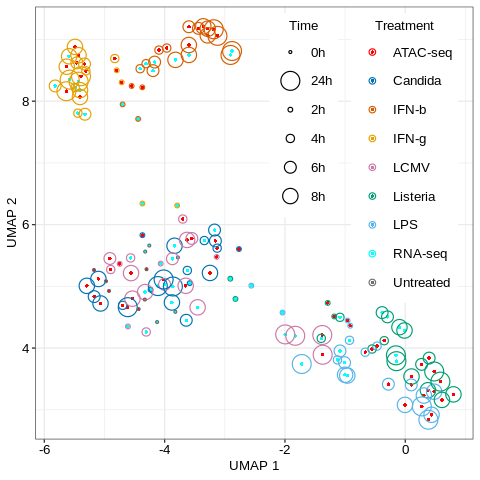

In [19]:
# plot UMAP data
UMAP_p <- ggplot(UMAP_data, aes(x=UMAP_1, y=UMAP_2, group=treatment)) +

# for time encoded by size and dots for modality
geom_point(aes(colour=library), shape=19, size=1, stroke = 0) +
geom_point(aes(size=time, color=treatment), shape=21, stroke = 0.5) +
scale_size_manual(values=time_sizes) +

scale_color_manual(values=treatment_colors, drop=FALSE) +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
guides(color=guide_legend(title="Treatment", order=2), size=guide_legend(title="Time", order=1)) +
    macro_theme() + theme(legend.position = c(0.75, 0.65), legend.box = "horizontal")

UMAP_p

In [20]:
# save plot
ggsave_new(filename=paste0("unsupervised_analysis_INT"),
           results_path=results_path,
           plot=UMAP_p,
           width=width,
           height=height
          )

# Deviating genes in correlation plots of untreated condition vs LO28 2h

In [14]:
# config 
# groupx <- 'LO28_6h'
# groupx <- 'LO28_2h'
top_n <- 10

In [15]:
# get data (values/signal intensities)
ut_lo28_data <- data.table()

ut_lo28_data$genes <- rownames(data)
ut_lo28_data$RNA_untreated <- rowMeans(data[ut_lo28_data$genes,(annot$library=='Quant-seq') & (annot$treatment=='untreated')])
ut_lo28_data$ATAC_untreated <- rowMeans(data[ut_lo28_data$genes,(annot$library=='ATAC-seq') & (annot$treatment=='untreated')])

ut_lo28_data$RNA_LO28_2h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='Quant-seq') & (annot$group=='LO28_2h')])
ut_lo28_data$ATAC_LO28_2h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='ATAC-seq') & (annot$group=='LO28_2h')])

ut_lo28_data$RNA_LO28_4h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='Quant-seq') & (annot$group=='LO28_4h')])
ut_lo28_data$ATAC_LO28_4h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='ATAC-seq') & (annot$group=='LO28_4h')])

ut_lo28_data$RNA_LO28_6h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='Quant-seq') & (annot$group=='LO28_6h')])
ut_lo28_data$ATAC_LO28_6h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='ATAC-seq') & (annot$group=='LO28_6h')])

ut_lo28_data$RNA_LO28_8h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='Quant-seq') & (annot$group=='LO28_8h')])
ut_lo28_data$ATAC_LO28_8h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='ATAC-seq') & (annot$group=='LO28_8h')])

ut_lo28_data$RNA_LO28_24h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='Quant-seq') & (annot$group=='LO28_24h')])
ut_lo28_data$ATAC_LO28_24h <- rowMeans(data[ut_lo28_data$genes,(annot$library=='ATAC-seq') & (annot$group=='LO28_24h')])


dim(ut_lo28_data)
head(ut_lo28_data)

[1] 45069    13

genes,RNA_untreated,ATAC_untreated,RNA_LO28_2h,ATAC_LO28_2h,RNA_LO28_4h,ATAC_LO28_4h,RNA_LO28_6h,ATAC_LO28_6h,RNA_LO28_8h,ATAC_LO28_8h,RNA_LO28_24h,ATAC_LO28_24h
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000098104,2.788176,2.153890,0.8112375,2.188401,1.377759,2.044712,2.977934,2.295448,1.121921,1.868510,0.6402755,3.501191
ENSMUSG00000033845,6.054132,5.822812,6.0827921,6.419991,6.049371,6.222069,5.818154,6.234925,5.784398,6.032096,5.6853532,5.670350
ENSMUSG00000025903,5.576490,5.714584,5.5898735,5.549484,5.684148,5.721310,5.757917,5.595320,5.691953,5.722914,5.7534876,5.897852
ENSMUSG00000033813,4.778988,5.106092,4.8157479,5.151488,4.962218,5.485389,5.603441,5.160262,5.596979,5.072404,5.1193128,5.116727
ENSMUSG00000033793,6.233386,6.259744,6.5474981,6.398867,6.439625,6.405507,6.478504,6.581854,6.576045,5.903324,7.4389056,5.943162
ENSMUSG00000025907,6.585940,6.877879,6.7635278,6.410766,6.455288,6.336404,6.435847,6.325988,6.600542,6.320715,6.9462801,6.180431


In [16]:
# get & add dea results as annotation
ut_dea_results <- data.table(dea_results[(dea_results$treatment=='untreated'),])
ut_dea_results[, type := ifelse((adj.P.Val<adjp_filter) & (abs(logFC)>LFC_filter) & (AveExpr>AveExpr_filter),ifelse(logFC>0,'ATAC','RNA'),'correlated')]
# dim(ut_dea_results)
# head(ut_dea_results)

ut_dea_results <- as.data.frame(ut_dea_results)
rownames(ut_dea_results) <- ut_dea_results$rn
ut_lo28_data$type <- ut_dea_results[ut_lo28_data$genes, 'type']
dim(ut_lo28_data)
head(ut_lo28_data)

[1] 45069    14

genes,RNA_untreated,ATAC_untreated,RNA_LO28_2h,ATAC_LO28_2h,RNA_LO28_4h,ATAC_LO28_4h,RNA_LO28_6h,ATAC_LO28_6h,RNA_LO28_8h,ATAC_LO28_8h,RNA_LO28_24h,ATAC_LO28_24h,type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000098104,2.788176,2.153890,0.8112375,2.188401,1.377759,2.044712,2.977934,2.295448,1.121921,1.868510,0.6402755,3.501191,correlated
ENSMUSG00000033845,6.054132,5.822812,6.0827921,6.419991,6.049371,6.222069,5.818154,6.234925,5.784398,6.032096,5.6853532,5.670350,correlated
ENSMUSG00000025903,5.576490,5.714584,5.5898735,5.549484,5.684148,5.721310,5.757917,5.595320,5.691953,5.722914,5.7534876,5.897852,correlated
ENSMUSG00000033813,4.778988,5.106092,4.8157479,5.151488,4.962218,5.485389,5.603441,5.160262,5.596979,5.072404,5.1193128,5.116727,correlated
ENSMUSG00000033793,6.233386,6.259744,6.5474981,6.398867,6.439625,6.405507,6.478504,6.581854,6.576045,5.903324,7.4389056,5.943162,correlated
ENSMUSG00000025907,6.585940,6.877879,6.7635278,6.410766,6.455288,6.336404,6.435847,6.325988,6.600542,6.320715,6.9462801,6.180431,correlated


In [17]:
# get & dea results from treatment
# lo28_dea_results <- data.frame(dea_results[(dea_results$group==groupx),])
# dim(lo28_dea_results)
# head(lo28_dea_results)

In [18]:
# get top_n deviating genes for highlighting in plot
rna_surplus <- rownames(ut_dea_results)[(ut_dea_results$logFC < -LFC_filter)&(ut_dea_results$adj.P.Val<adjp_filter)&(ut_dea_results$AveExpr>AveExpr_filter)]
atac_potential <- rownames(ut_dea_results)[(ut_dea_results$logFC > LFC_filter)&(ut_dea_results$adj.P.Val<adjp_filter)&(ut_dea_results$AveExpr>AveExpr_filter)]

ut_top_genes_ATAC <- rownames(ut_dea_results[rna_surplus,])[order(ut_dea_results[rna_surplus,'logFC'])[1:top_n]] #ut_dea_results$rn[sort((ut_dea_results$logFC), decreasing=TRUE, index.return = TRUE)$ix[1:top_n]]
ut_top_genes_RNA <- rownames(ut_dea_results[atac_potential,])[order(ut_dea_results[atac_potential,'logFC'], decreasing = TRUE)[1:top_n]] #ut_dea_results$rn[sort((ut_dea_results$logFC), decreasing=FALSE, index.return = TRUE)$ix[1:(top_n)]]
# lo28_top_genes_RNA <- lo28_dea_results$rn[sort((lo28_dea_results$logFC), decreasing=FALSE, index.return = TRUE)$ix[1:top_n]]

top_genes <- union(ut_top_genes_ATAC, ut_top_genes_RNA)
# top_genes <- ut_top_genes_ATAC
# top_genes <- lo28_top_genes_RNA

# remove GmXXXX and XXXRik genes
top_genes <- top_genes[!grepl("*.Rik|Gm.*",annot_genes[top_genes,'external_gene_name'])]

ut_dea_results[top_genes,'label']<- annot_genes[top_genes,'external_gene_name']
ut_lo28_data$label <- ut_dea_results[ut_lo28_data$genes, 'label']

In [19]:
length(top_genes)

[1] 16

In [20]:
annot_genes[top_genes,'external_gene_name']

[1] "Rtkn2"   "Liph"    "Plgrkt"  "Wdr25"   "Il1rl1"  "Zfp941"  "Etfbkmt"
 [8] "Rasgrp1" "Mycl"    "Apol9a"  "Cxcl11"  "Ifitm10" "Pacsin1" "Prdm1"  
[15] "Cxcl3"   "Cxcl9"

In [21]:
# colors for epigenetic correlation plots
correlation_colors

RNA       ATAC correlated 
 "#00FFFF"  "#FF0000"  "#000000"

In [22]:
unlist(unname(c(ut_lo28_data[ut_lo28_data$label!='NA','type'])))

[1] "RNA"  "ATAC" "ATAC" "ATAC" "ATAC" "ATAC" "RNA"  "RNA"  "ATAC" "RNA" 
[11] "RNA"  "ATAC" "ATAC" "RNA"  "ATAC" "RNA"

In [23]:
unname(correlation_colors[unlist(unname(c(ut_lo28_data[ut_lo28_data$label!='NA','type'])))])

[1] "#00FFFF" "#FF0000" "#FF0000" "#FF0000" "#FF0000" "#FF0000" "#00FFFF"
 [8] "#00FFFF" "#FF0000" "#00FFFF" "#00FFFF" "#FF0000" "#FF0000" "#00FFFF"
[15] "#FF0000" "#00FFFF"

In [24]:
# set global min and max
x_min <- -5
x_max <- 12.5
y_min <- -2
y_max <- 12

In [56]:
# plot epigenetic correlation data
epig_correlation_p <- list()

options(ggrepel.max.overlaps = Inf)

for (axis in list(ut=c('ATAC_untreated','RNA_untreated'),LO28_2h=c('ATAC_LO28_2h','RNA_LO28_2h'),LO28_4h=c('ATAC_LO28_4h','RNA_LO28_4h'), LO28_6h=c('ATAC_LO28_6h','RNA_LO28_6h'), LO28_8h=c('ATAC_LO28_8h','RNA_LO28_8h'), LO28_24h=c('ATAC_LO28_24h','RNA_LO28_24h'))){
    xaxis <- axis[1]
    yaxis <- axis[2]
    label <- "label"
    
    annot_label <- gsub('ATAC ', "", treatment_format(xaxis))

#     print(paste0(yaxis, '+', xaxis)) 
    epig_correlation_p[[paste0(yaxis, '+', xaxis)]] <- ggplot(setDT(setDF(ut_lo28_data)))+
#     stat_density_2d(data = subset(setDT(setDF(ut_lo28_data)), type == 'correlated'), aes_string(x = xaxis, y = yaxis, color = 'type'), geom = "polygon") +
    ggrastr::geom_point_rast(data = subset(setDT(setDF(ut_lo28_data)), type == 'correlated'), aes_string(x = xaxis, y = yaxis, color = 'type'), alpha=0.05, size=0.5, stroke = 0, shape=19) + # before geom_point()
    ggrastr::geom_point_rast(data = subset(setDT(setDF(ut_lo28_data)), type != 'correlated'), aes_string(x = xaxis, y = yaxis, color = 'type'), alpha=1, size=0.5, stroke = 0, shape=19) +
    ggrastr::geom_point_rast(data = subset(setDT(setDF(ut_lo28_data)), label != 'NA'), aes_string(x = xaxis, y = yaxis, fill = 'type'), color='black', alpha=1, size=0.75, stroke = 0.25, shape=21) +
    scale_color_manual(values=correlation_colors, drop=FALSE) +
#     annotate(x=min(ut_lo28_data[[xaxis]]), y = max(ut_lo28_data[[yaxis]]), label=paste("Pearson's R = ", round(cor(ut_lo28_data[[xaxis]], ut_lo28_data[[yaxis]]),2)), geom="text", hjust=0, size=4)+
    annotate(x = x_min, y = y_max, label=paste0("Pearson's R = ", round(cor(ut_lo28_data[[xaxis]], ut_lo28_data[[yaxis]]),2)), geom="text", hjust=0, size=4)+
#     {if (annot_label=="Untreated") annotate(x=9, y = 1, label=table(ut_lo28_data$type)[['ATAC']], geom="label", hjust=0, size=4, fill = correlation_colors[['ATAC']])}+
#     {if (annot_label=="Untreated") annotate(x=-2, y = 8, label=table(ut_lo28_data$type)[['RNA']], geom="label", hjust=0, size=4, fill = correlation_colors[['RNA']])}+
#     {if (annot_label=="Untreated") annotate(x=8, y = 11, label=table(ut_lo28_data$type)[['correlated']], geom="label", hjust=0, size=4, color = 'black')} +
#     geom_label_repel(data = subset(setDT(setDF(ut_lo28_data)), label != 'NA'), # old labels
#                      aes_string(x = xaxis, y = yaxis, label=label), 
#                      size = 3,
#                      box.padding = if(grepl('untreated',axis[1]) | grepl('24h',axis[1])) 0.25 else if(grepl('2h',axis[1])) 1 else 2,
#                     min.segment.length = 0,
#                     segment.size = 0.2, # line thickness
#                      xlim=if(grepl('untreated',axis[1])) c(NA,NA) else c(-4,12),
#                      fill = alpha(c("white"),0.75),
#                      seed = 42
#                     ) +
    geom_label_repel(data = subset(setDT(setDF(ut_lo28_data)), label != 'NA' & type=="RNA"), # labels for transcriptional surplus in UT
                   aes_string(x = xaxis, y = yaxis, label=label),
                     fontface = "bold",
                   size = 3,
                   box.padding = 0.25,
                   min.segment.length = 0,
                   segment.size = 0.2, # line thickness
                   xlim = c(x_min, 0),
                   fill = alpha(correlation_colors["RNA"],0.2),
                   # fill = alpha(c("white"),0.75),
                   seed = 42,
                   hjust = 0.5
                  ) +
    geom_label_repel(data = subset(setDT(setDF(ut_lo28_data)), label != 'NA' & type=="ATAC"), # labels for epigenetic potential in UT
                   aes_string(x = xaxis, y = yaxis, label=label), 
                     fontface = "bold",
                   size = 3,
                   box.padding = 0.25,
                   min.segment.length = 0,
                   segment.size = 0.2, # line thickness
                   xlim = c(8,x_max),
                   fill = alpha(correlation_colors["ATAC"],0.2),
                   # fill = alpha(c("white"),0.75),
                   seed = 42,
                   hjust = 0.5
                  ) +
#     scale_color_discrete(aesthetics = c("color", "segment.color")) +
    lims(x= c(x_min, x_max), y = c(y_min, y_max)) +
#     coord_fixed()+
    ggtitle(annot_label) +
    macro_theme()+
    theme(
        axis.title.x=element_blank(),
        axis.title.y=element_blank()) +
    guides(color="none", fill="none") 
}

In [57]:
width <- 3
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

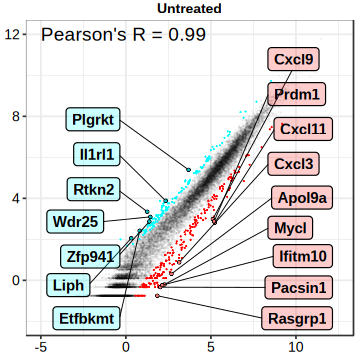

In [58]:
epig_correlation_p[[names(epig_correlation_p)[1]]]

In [59]:
# save plot
ggsave_new(filename="epigenetic_correlation_Untreated",
           results_path=results_path,
           plot=epig_correlation_p[[names(epig_correlation_p)[1]]],
           width=width,
           height=height
          )

In [60]:
width <- 18 #15
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

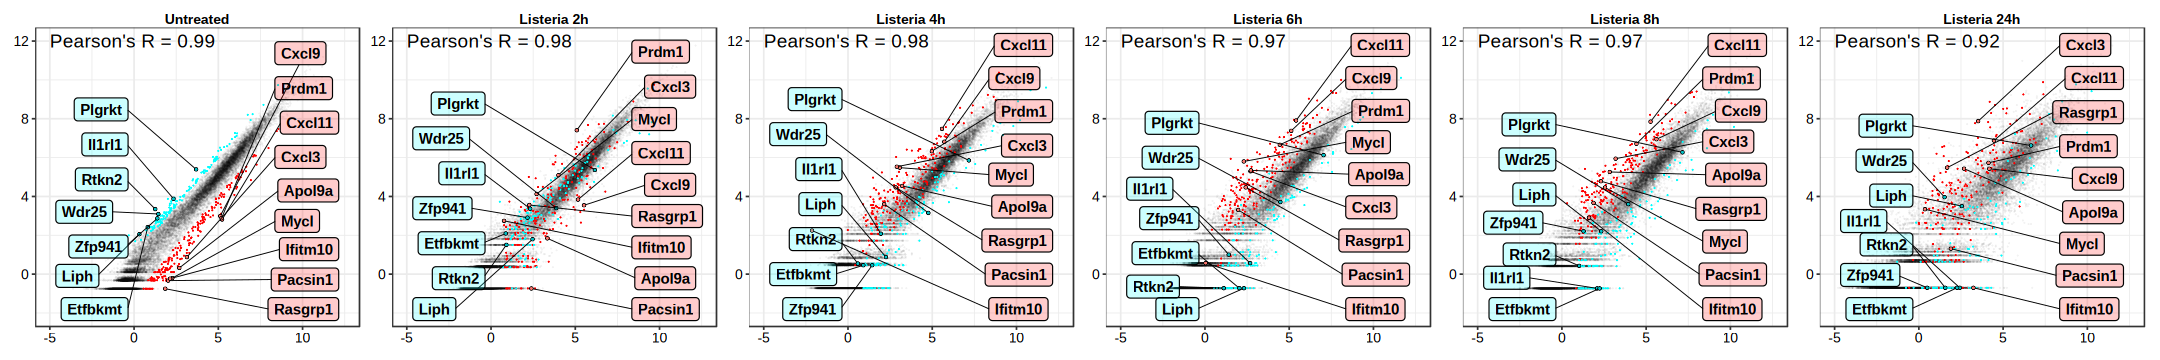

In [61]:
epig_corr_p <- wrap_plots(epig_correlation_p[1:length(epig_correlation_p)], ncol = 6) # 2:length ... ncol = 5
epig_corr_p

In [62]:
# save plot
ggsave_new(filename="epigenetic_correlation_all", # epigenetic_correlation_Listeria
           results_path=results_path,
           plot=epig_corr_p,
           width=width,
           height=height
          )

# Time Series Clustering - Listeria

## Time Series

In [37]:
# plot only Listeria
treatment <- 'LO28'

# ts_p[['LO28']] + xlab('time [hours]') + geom_dl(aes(label = cluster), method = list(dl.trans(x = x + 0.2), "last.points", cex = 0.8))

ts_k <- timeseries_k[treatment, 'INT']

tmp_centers <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',ts_k), paste0('clustercenters_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)
tmp_centers <- melt(t(tmp_centers))
tmp_centers$Var1 <- paste0(lapply(tmp_centers$Var1, function(x) as.character(x)))
colnames(tmp_centers) <- c('time','cluster','LFC')
tmp_centers <- tmp_centers[tmp_centers$time!='X',]
tmp_centers$time <- str_remove(tmp_centers$time,'X')
tmp_centers$time <- str_remove(tmp_centers$time,'h')
tmp_centers$time <- factor(tmp_centers$time, levels=c("0", "2", "4", "6","8", "24"))

tmp_centers$cluster <- paste0(tmp_centers$cluster)

treatment <- str_replace(treatment, '_', ' ')
tmp_centers$treatment <- treatment

Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”


In [38]:
width <- 3
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

In [39]:
# format treatment
tmp_centers$treatment <- treatment_format(tmp_centers$treatment)

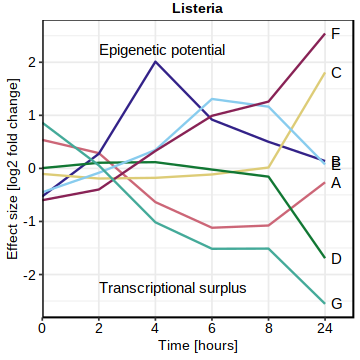

In [41]:
tmp_centers_p <- ggplot(tmp_centers, aes(x=time, y=LFC, group=cluster)) +
geom_line(aes(color=cluster), size=0.5)+
scale_x_discrete(expand = expansion(add = c(0,0.5))) +
annotate(x=2, y = 2.25, label="Epigenetic potential", geom="text", hjust=0, size=3) +
annotate(x=2, y = -2.25, label="Transcriptional surplus", geom="text", hjust=0, size=3) +
geom_text(data = tmp_centers[tmp_centers$time==24,], aes(label=cluster_format2(cluster)), size = 3, hjust=0, nudge_x=0.1) + 
xlab("Time [hours]") + 
ylab("Effect size [log2 fold change]") +
ggtitle("Listeria") +
macro_theme() + 
scale_color_manual(values=cluster_colors, drop=FALSE) +
theme(
#     axis.title.x=element_blank(), 
#     axis.title.y=element_blank(),
#     plot.title = element_text(hjust = 0.5), # not necessary
    strip.background =element_rect(fill=treatment_colors[treatment]), 
    strip.text = element_text(colour = 'black'),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5)
)  + guides(color="none")
                                  

tmp_centers_p

In [42]:
# save plot
ggsave_new(filename="time_series_LO28",
           results_path=results_path,
           plot=tmp_centers_p,
           width=width,
           height=height
          )

## Clustering

In [43]:
# load and summarize results for each treatment (treatment, cluster, number of genes/regions)
clust_int <- data.table()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'INT']
    tmp_clust <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',ts_k), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)

    tmp_sum <- data.table(table(tmp_clust[,4]))
    colnames(tmp_sum) <- c('cluster', 'n')
    tmp_sum$treatment <- treatment

    if (nrow(clust_int)==0){
        clust_int <- tmp_sum
    }else{
        clust_int <- rbind(clust_int, tmp_sum)
    }
}

dim(clust_int)
head(clust_int)

[1] 32  3

cluster,n,treatment
<chr>,<int>,<chr>
1,92,C_albicans
2,58,C_albicans
3,114,C_albicans
4,109,C_albicans
5,27,C_albicans
6,77,C_albicans


In [44]:
# order by total number of genes/regions (left to right)
treatment_sum <- clust_int[,sum(n),by=treatment][order(V1),]
treatments_ordered <- treatment_sum$treatment
clust_int$treatment <- factor(clust_int$treatment, levels=rev(treatments_ordered))

# get number of clusters
treatment_cluster_n <- data.frame(clust_int[, max(as.numeric(cluster)),by=treatment])
rownames(treatment_cluster_n) <- treatment_cluster_n$treatment
treatment_cluster_n$treatment <- NULL
treatment_sum$clusters_n <- treatment_cluster_n[treatment_sum$treatment,'V1']

# sort legend
clust_int$cluster <- factor(clust_int$cluster, levels=sort(as.numeric(unique(clust_int$cluster))))

# subset for Listeria
clust_int <- clust_int[clust_int$treatment=="LO28"]
treatment_sum <- treatment_sum[treatment_sum$treatment=="LO28"]
# format
clust_int$treatment <- sapply(clust_int$treatment, treatment_format)
treatment_sum$treatment <- sapply(treatment_sum$treatment, treatment_format)

In [45]:
# Reverse the order of clusters
clust_int <- clust_int[order(clust_int$treatment, -clust_int$cluster),]

# Calculate the cumulative sum of 'n' for each treatment
clust_int$cum_n <- ave(clust_int$n, clust_int$treatment, FUN=cumsum)

# Calculate the middle y-coordinate for each cluster
clust_int$middle_n <- clust_int$cum_n - (clust_int$n / 2)

# reformat treatments for correct coloring
clust_int$treatment <- str_replace(clust_int$treatment, '_', ' ')
treatment_sum$treatment <- str_replace(treatment_sum$treatment, '_', ' ')

# reorder by treatment
clust_int$treatment <- factor(clust_int$treatment, levels=unique(clust_int$treatment))

In [46]:
width <- 1
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

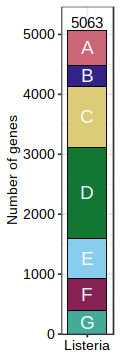

In [47]:
clust_int_p <- ggplot() + 
    geom_bar(data=clust_int, aes(fill=cluster, y=n, x=treatment), position="stack", stat="identity", color="black", size=0.2)+
# geom_text(data=treatment_sum, aes(x=treatment, y=V1, label=clusters_n), vjust=-0.25, hjust=0.5, size=4)+
# geom_text(data=treatment_sum, aes(x=treatment, y=V1, label=V1), vjust=1.5, hjust=0.5, size=3, color="white")+
geom_text(data=treatment_sum, aes(x=treatment, y=V1, label=V1), vjust=-0.25, hjust=0.5, size=3)+
geom_text(data=clust_int, aes(x=treatment, y=middle_n, label=cluster_format2(cluster)), size=4, color="white")+
# geom_text(data=clust_int, aes(x=treatment, y=n, label=n), position = position_stack(vjust = .25), size=4, color="white")+
# scale_fill_manual(values=cluster_colors, limits = force) +
scale_fill_manual(values=cluster_colors) +
# scale_alpha_manual(values=cluster_alphas) +
scale_x_discrete(label=treatment_format) +
scale_y_continuous(expand = expansion(add = c(0,400)))+
    macro_theme() + 
ylab("Number of genes") +
theme(axis.title.x=element_blank()) +  guides(fill="none", alpha="none")

clust_int_p

## plot together with patchwork

In [48]:
width <- 4.5
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

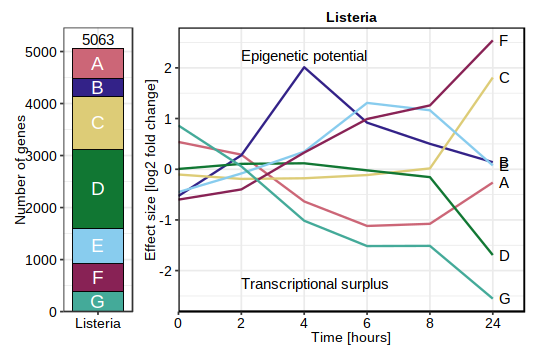

In [49]:
time_series_clustering_LO28_p <- wrap_plots(list(clust_int_p, tmp_centers_p), widths = c(1,5))
time_series_clustering_LO28_p

In [50]:
# save plot
ggsave_new(filename="time_series_clustering_LO28",
           results_path=results_path,
           plot=time_series_clustering_LO28_p,
           width=width,
           height=height
          )

# Enrichment analysis results for Listeria clusters

In [57]:
# configs
treatment <- 'LO28'
k <- timeseries_k[treatment, 'INT']
db <- timeseries_enrichment_terms[treatment, 'INT_database']

In [58]:
# load odds ratios of enrichment results

tmp_enrichments <- read.delim(file=file.path(data_path, 
                                             "enrichment_analysis", 
                                             "time_series", 
                                             treatment, 
                                             paste0('k_', k), 
                                             paste0('summary_',db,'_oddsratio.csv')
                                            ), 
                              sep=',', header = TRUE, row.names=1)

# tmp_terms <- unique(rownames(tmp_enrichments)[apply(tmp_enrichments,2,which.min)])

tmp_terms <- str_split(string = timeseries_enrichment_terms[treatment,'INT_terms'], pattern = ' \\| ')[[1]]
tmp_terms <- unique(tmp_terms)

# filter by selected enrichment terms
tmp_enrichments <- tmp_enrichments[tmp_terms,]
# fill NA with 1
tmp_enrichments[is.na(tmp_enrichments)] <- 1
tmp_enrichments[tmp_enrichments<1] <- 1
print(max(log2(tmp_enrichments)))
# perform hierarchical clustering on the odds ratios of the terms
hc_INT_rows <- hclust(dist(log2(tmp_enrichments)))
hc_INT_cols <- hclust(dist(t(log2(tmp_enrichments))))
tmp_enrichments <- tmp_enrichments[hc_INT_rows$order,hc_INT_cols$order]
# add column for terms
tmp_enrichments$terms <- rownames(tmp_enrichments)
# melt data frame for plotting
plot_enrichments <- melt(tmp_enrichments)
# rename columns
colnames(plot_enrichments) <- c('terms','cluster', 'odds_ratio')

[1] 6.127349


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables



In [59]:
# load adjusted p-values
tmp_adjpvalues <- read.delim(file=file.path(data_path, 
                                             "enrichment_analysis", 
                                             "time_series", 
                                             treatment, 
                                             paste0('k_', k), 
                                             paste0('summary_',db,'_adjpvalues.csv')
                                            ), 
                              sep=',', header = TRUE, row.names=1)

# add adjusted p-values to plot dataframe
plot_enrichments$adjpvalues <- apply(plot_enrichments, 1, function(x) tmp_adjpvalues[x[1], x[2]])

In [60]:
plot_enrichments$terms <- remove_term_suffix(db=db, terms=plot_enrichments$terms)

In [61]:
# calculate & cap -log10(pvalue)
plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4

In [62]:
plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA

In [63]:
# ensure that the order of terms & clusters is kept
plot_enrichments$terms <- factor(plot_enrichments$terms,levels=rev(unique(plot_enrichments$terms)))
plot_enrichments$cluster <- factor(plot_enrichments$cluster, levels=rev(unique(plot_enrichments$cluster)))

In [64]:
dim(plot_enrichments)
head(plot_enrichments)

[1] 217   4

,terms,cluster,odds_ratio,adjpvalues
,<fct>,<fct>,<dbl>,<dbl>
1,regulation of phosphatidylinositol biosynthetic process,cluster_7,69.906218,3.862170
2,positive regulation of phosphatidylinositol 3-kinase signaling,cluster_7,4.653161,1.093079
3,positive regulation of stress-activated MAPK cascade,cluster_7,6.217309,2.041736
4,positive regulation of I-kappaB kinase/NF-kappaB signaling,cluster_7,3.789908,1.391099
5,"phagocytosis, engulfment",cluster_7,6.636102,1.005913
6,regulation of MHC class II biosynthetic process,cluster_7,31.771314,2.894549


In [65]:
cluster_labels <- str_split(rev(levels(plot_enrichments$cluster)), '_', simplify=TRUE)[,2]
names(cluster_labels) <- rev(levels(plot_enrichments$cluster))

In [66]:
width <- 10
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

Warning message:
“Removed 98 rows containing missing values (geom_point).”


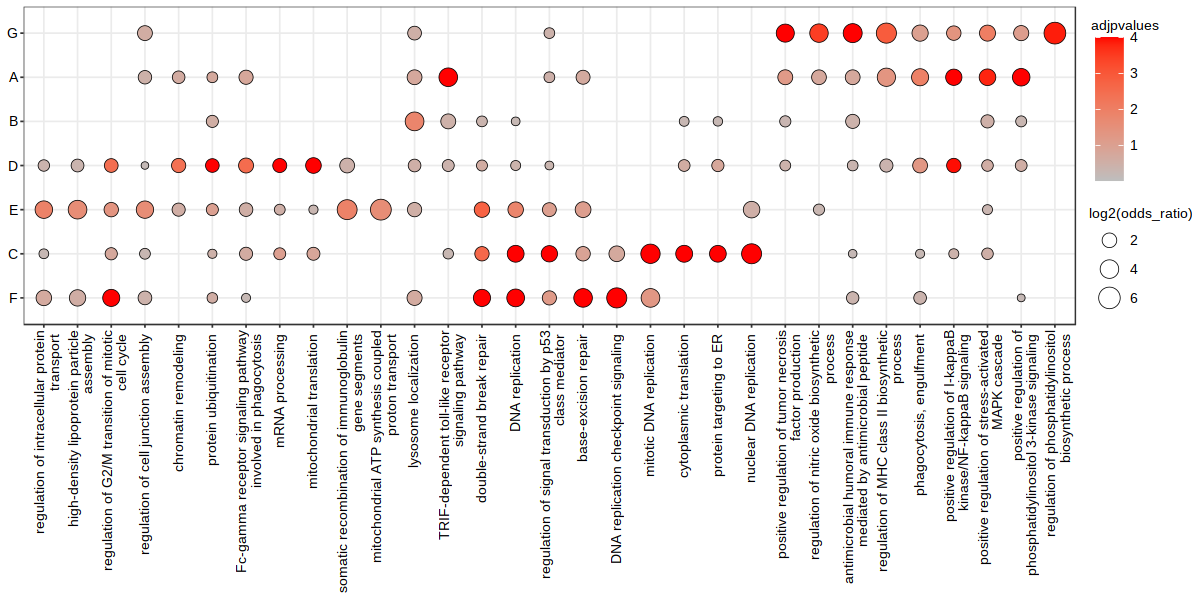

In [67]:
enr_p <- ggplot(plot_enrichments, aes(x=terms, y=cluster, fill=adjpvalues, size=log2(odds_ratio)))+ 
# geom_point() +
geom_point(shape=21, stroke=0.25) +
# scale_color_gradient(low="grey", high="red") +
scale_fill_gradient(low="grey", high="red") +
scale_x_discrete(label=addline_format) + 
scale_size_continuous(
#             range = c(0.5,5) 
        breaks = c(2, 4, 6),
        limits = c(0, 7)
    ) +
macro_theme() +
scale_y_discrete(limits = (levels(plot_enrichments$cluster)), labels = cluster_format2(cluster_labels)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.75),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

enr_p

In [68]:
# load time-series clustering
clustering <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',k), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE, row.names=2)
clustering[,1] <- NULL
colnames(clustering) <- c('gene','cluster')
dim(clustering)
head(clustering)

[1] 5063    2

,gene,cluster
,<chr>,<int>
ENSMUSG00000091971,Hspa1a,7
ENSMUSG00000024431,Nr3c1,4
ENSMUSG00000029414,Kntc1,6
ENSMUSG00000000204,Slfn4,7
ENSMUSG00000029759,Pon3,7
ENSMUSG00000020806,Rhbdf2,7


In [69]:
# fitler DEA results for individual cluster plots
dea_filtered <- dea_results[(dea_results$treatment==treatment) | (dea_results$treatment=='untreated'), c('group', 'rn', 'logFC')]

dim(dea_filtered)
head(dea_filtered)

[1] 270414      3

,group,rn,logFC
,<chr>,<chr>,<dbl>
901381,LO28_24h,ENSMUSG00000092609,7.433594
901382,LO28_24h,ENSMUSG00000083233,4.095293
901383,LO28_24h,ENSMUSG00000114493,3.058069
901384,LO28_24h,ENSMUSG00000098822,3.890188
901385,LO28_24h,ENSMUSG00000098279,4.637897
901386,LO28_24h,ENSMUSG00000102774,4.151274


In [70]:
times <- c('0h', '2h','4h','6h','8h','24h')
# DEG_new <- data.frame()

for (time in times){
    if (time=='0h'){
        tmp_df <- dea_filtered[dea_filtered$group==paste0('untreated_',time),c('rn','logFC')]
    }else{
        tmp_df <- dea_filtered[dea_filtered$group==paste0(treatment,'_',time),c('rn','logFC')]
    }

    colnames(tmp_df) <- c('rn',time)
    
    if (time=='0h'){
        DEG_new <- tmp_df
    }
    else{
        DEG_new <- merge(DEG_new, tmp_df, by='rn')
    }
    
}

rownames(DEG_new) <- DEG_new$rn
DEG_new$rn <- NULL
# colnames(RNA_DEG_new) <- str_remove(colnames(RNA_DEG_new), paste0(treatment,'_'))
colnames(DEG_new) <- str_remove(colnames(DEG_new), 'h')

DEG_new <- DEG_new[rownames(clustering),]


dim(DEG_new)
head(DEG_new)

[1] 5063    6

,0,2,4,6,8,24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000091971,1.0051223,-1.15804934,0.05696336,-0.44058301,-1.4829054,-3.301094
ENSMUSG00000024431,-0.4785386,0.04295652,0.23478898,0.03011838,0.1610394,-3.320942
ENSMUSG00000029414,-0.8923123,-0.55703493,-0.43359297,0.04939084,0.3610991,5.067256
ENSMUSG00000000204,1.2483154,0.60929021,0.16380697,-1.68125036,-1.3735768,-4.674012
ENSMUSG00000029759,0.4524190,-0.02421879,-0.47350081,-0.93621967,-0.4144666,-3.241337
ENSMUSG00000020806,0.6851935,-0.06597768,-0.94289786,-1.42923126,-0.5664761,-2.530475


In [71]:
DEG_plot <- melt(t(DEG_new))
DEG_plot$Var1 <- factor(DEG_plot$Var1, levels=c("0", "2", "4", "6","8", "24"))
head(DEG_plot)

Warning message in melt(t(DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(DEG_new)). In the next version, this warning will become an error.”


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,0,ENSMUSG00000091971,1.00512234
2,2,ENSMUSG00000091971,-1.15804934
3,4,ENSMUSG00000091971,0.05696336
4,6,ENSMUSG00000091971,-0.44058301
5,8,ENSMUSG00000091971,-1.48290543
6,24,ENSMUSG00000091971,-3.30109431


In [72]:
# get order of clusters from enrichment plot 
clusters_ordered <- rev(as.numeric(str_split(levels(plot_enrichments$cluster),'_', simplify = TRUE)[,2]))
clusters_ordered

[1] 7 1 2 4 5 3 6

In [73]:
# make time-series cluster plots
DEG_p <- list()

for (cluster in clusters_ordered){ #unique(clustering$cluster)){
    tmp_idx <- (DEG_plot$Var2 %in% rownames(clustering)[clustering$cluster==cluster])
    DEG_plot[tmp_idx,'cluster'] <- paste('cluster',cluster)
    tmp_cluster_p <- ggplot(DEG_plot[tmp_idx,], aes(x=Var1, y=value, group=Var2)) +
    geom_line(size=0.5, alpha=0.05, color=cluster_colors[cluster]) + #treatment_colors["Listeria"]
#     facet_grid(. ~ cluster) +
    scale_x_discrete(expand = expansion(add = 0))+
    scale_y_continuous(breaks=c(-3,0,3)) +
#     scale_y_continuous(breaks=c(0)) + # only zero
    macro_theme() + 
    theme(
        axis.title.x=element_blank(),
        axis.title.y=element_blank(), 
        plot.margin = unit(c(0,0,0,0), "cm"),
        plot.title = element_text(hjust = 0.5) # not necessary
#         strip.background =element_rect(fill=treatment_colors[treatment]), 
#         strip.text = element_text(colour = 'black'),
#         panel.border = element_rect(colour = "black", fill=NA, size=1)
    )
    
    # last entry can keep the x axis labels                                 
    if(cluster==clusters_ordered[length(clusters_ordered)]){ #max(unique(clustering$cluster))){
        DEG_p[[cluster]] <- tmp_cluster_p
    }
    else{
        DEG_p[[cluster]] <- tmp_cluster_p + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
    }
    
}

In [74]:
width <- 1
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

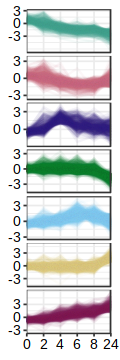

In [75]:
# plot all time-series clusters 
DEG_all_p <- wrap_plots(DEG_p[clusters_ordered], ncol = 1)
DEG_all_p

In [76]:
width <- 8
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

Warning message:
“Removed 98 rows containing missing values (geom_point).”


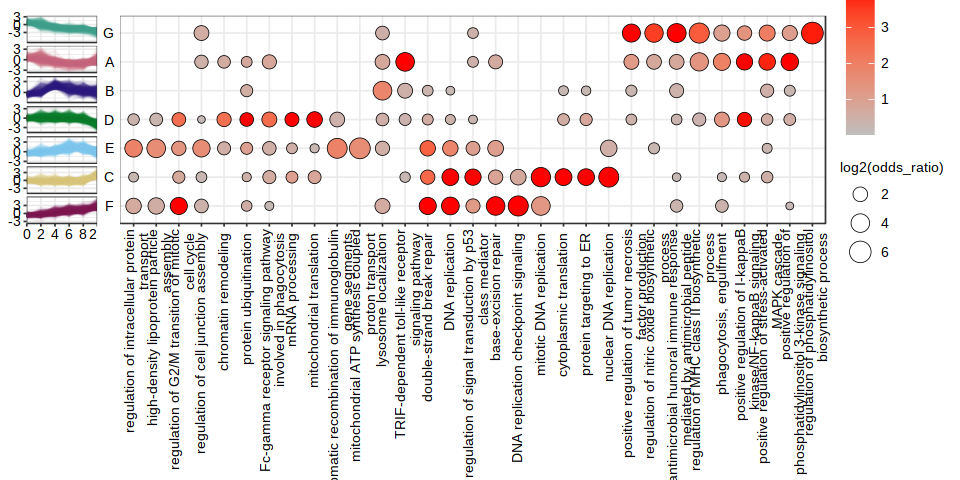

In [77]:
listeria_p <- (DEG_all_p | enr_p + theme(axis.ticks.y = element_blank())) + plot_layout(widths = c(1, 10))
listeria_p

In [78]:
# save plot
ggsave_new(filename="LO28_enrichments_INT",
           results_path=results_path,
           plot=listeria_p,
           width=width,
           height=height
          )

Warning message:
“Removed 98 rows containing missing values (geom_point).”
Warning message:
“Removed 98 rows containing missing values (geom_point).”


Warning message:
“Removed 98 rows containing missing values (geom_point).”


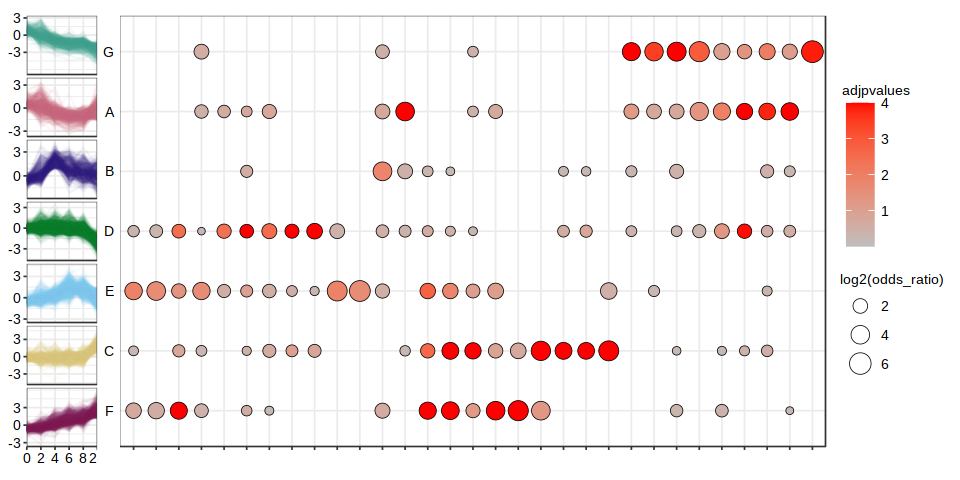

In [79]:
listeria_p <- (DEG_all_p | enr_p + theme(axis.ticks.y = element_blank(), axis.text.x=element_blank())) + plot_layout(widths = c(1, 10))
listeria_p

# TF analysis results heatmap for Listeria clusters

In [92]:
# configs
treatment <- 'LO28'
k <- timeseries_k[treatment, 'INT']
top_n <- 5 # 8->Rela shows up, 12->Irf9 shows up

In [93]:
# load TF analysis results
tf_NES <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_maxNES.csv')))
tf_nEnrGenes <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_nEnrGenes_norm.csv')))

In [94]:
# select relevant TFs

# NES
NES_df <- data.frame(t(tf_NES))
NES_df[is.na(NES_df)] <- 0
# top_tfs_NES <- unique(unlist(as.list(sapply(NES_df, function(x) rownames(NES_df)[sort(x, decreasing=TRUE, index.return = TRUE)$ix][1:top_n]))))
top_tfs_NES <- unique(as.vector(sapply(NES_df, function(x) rownames(NES_df)[order(-x)][1:top_n])))

# nEnrGenes
nEnrGenes_df_norm <- data.frame(t(tf_nEnrGenes))
nEnrGenes_df_norm[is.na(nEnrGenes_df_norm)] <- 0
top_tfs_nEnrGenes <- unique(unlist(as.list(sapply(nEnrGenes_df_norm, function(x) rownames(nEnrGenes_df_norm)[sort(x, decreasing=TRUE, index.return = TRUE)$ix][1:top_n]))))

In [95]:
# heatmap annotation & color configs
annotation_col <- data.frame(row.names=(colnames(NES_df)))
annotation_col$Cluster <- str_split_fixed(colnames(NES_df),'cluster_',2)[,2]

ann_colors = list(
                Cluster = cluster_colors
            )

In [96]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

### NES

In [97]:
NES_df <- log2(NES_df+1)

In [98]:
# format cluster labels
colnames(NES_df) <- unlist(lapply(colnames(NES_df), cluster_format2))
rownames(annotation_col) <- unlist(lapply(rownames(annotation_col), cluster_format2))
annotation_col$Cluster <- unlist(lapply((annotation_col$Cluster), cluster_format2))
names(ann_colors$Cluster) <- unlist(lapply(names(ann_colors$Cluster), cluster_format2))

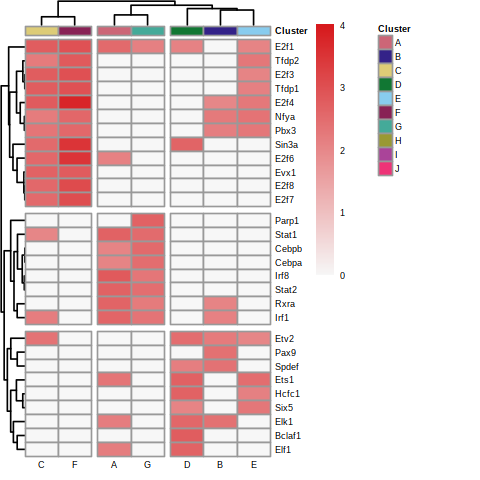

In [99]:
# plot heatmaps
TF_NES_HM_p <- as.ggplot(pheatmap((NES_df[top_tfs_NES,]),
         show_rownames=T,
         show_colnames=T, 
         cutree_rows = 3, # split row clusters
         cutree_cols = 3, # split col clusters 
         treeheight_row = 10,
         treeheight_col = 10,
         annotation_col = annotation_col, # annotate clusters
         annotation_colors = ann_colors, # add color to labels
         annotation_names_col = T,
         breaks=seq(0, 4, length.out=200), # make log2(OR=1)=0 the middle of color scale
         color=colorRampPalette(c("#f7f7f7", "#d7191c"))(200),
         fontsize = 5,
         angle_col = "0",
         height=height,
         widht=width,
        silent=TRUE
      ))
TF_NES_HM_p

In [100]:
# save plot
ggsave_new(filename=paste0("INT_LO28_TF_NES_top",top_n),
           results_path=results_path,
           plot=TF_NES_HM_p,
           width=width,
           height=height
          )

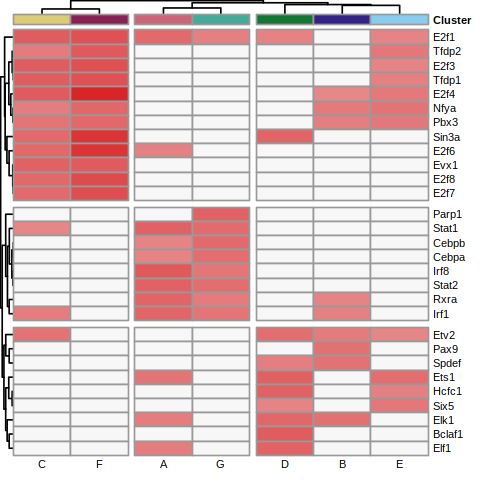

In [101]:
# plot heatmap for patchwork plot
TF_NES_HM_p <- as.ggplot(pheatmap((NES_df[top_tfs_NES,]),
         show_rownames=T,
         show_colnames=T, 
         annotation_legend = FALSE,
         legend = FALSE,
         cutree_rows = 3, # split row clusters
         cutree_cols = 3, # split col clusters 
         treeheight_row = 3,
         treeheight_col = 3,
         annotation_col = annotation_col, # annotate clusters
         annotation_colors = ann_colors, # add color to labels
         annotation_names_col = T,
         breaks=seq(0, 4, length.out=200), # make log2(OR=1)=0 the middle of color scale
         color=colorRampPalette(c("#f7f7f7", "#d7191c"))(200),
         fontsize = 6,
         angle_col = "0",
         height=height,
         widht=width,
        silent=TRUE
      ))
TF_NES_HM_p

# Figure 3

Warning message:
“Removed 98 rows containing missing values (geom_point).”


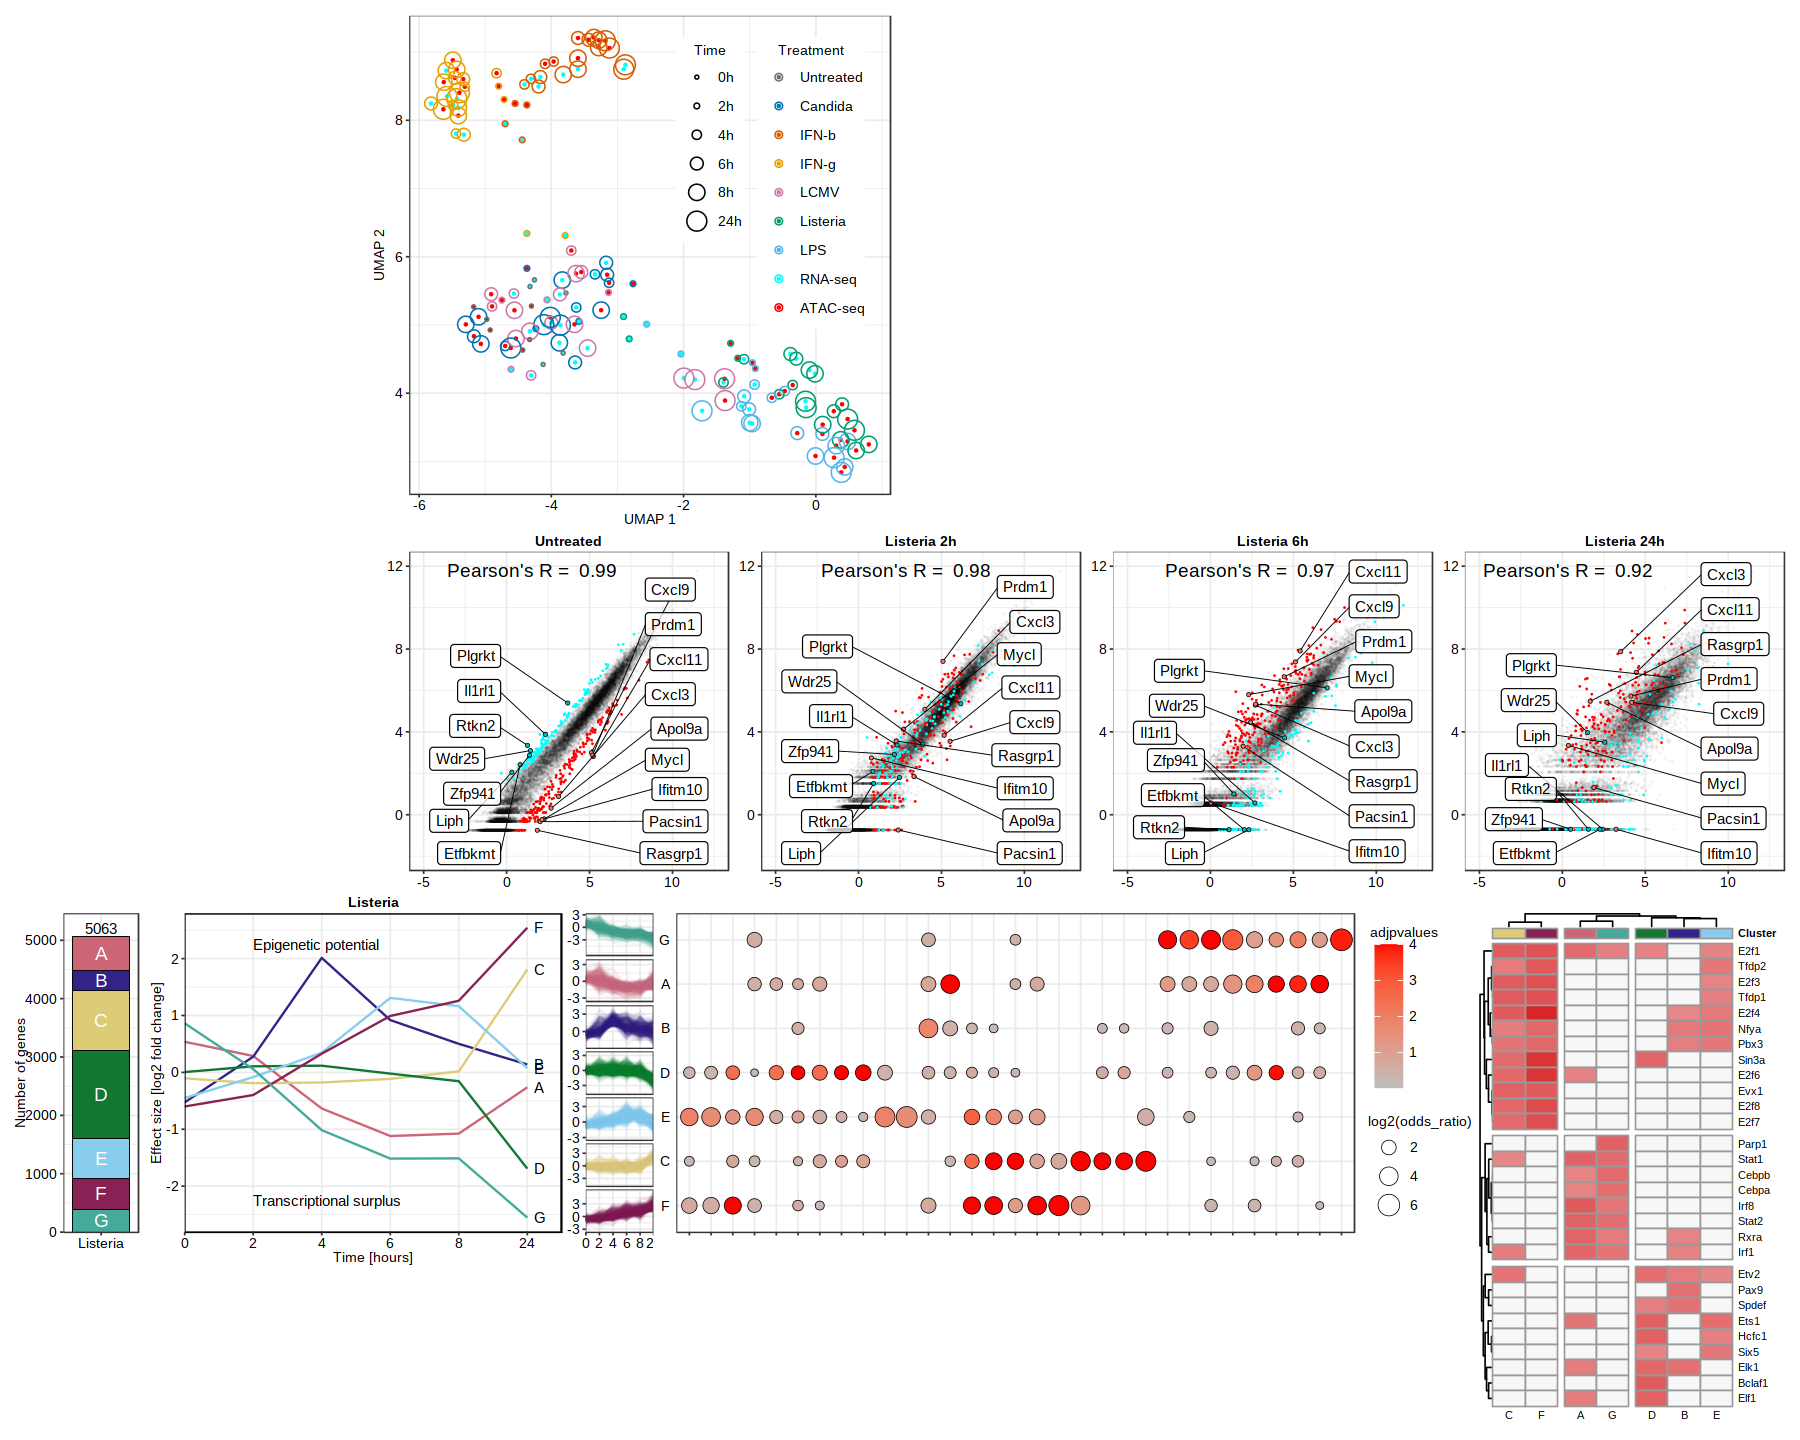

In [104]:
# SIZE
# A4 8.27 x 11.69 inches -> 8.25 x 11.5
width <- 15 # width 19cm -> 7.4 -> 8in
height <- 12 # height 15cm -> 6in 
options(repr.plot.width=width, repr.plot.height=height)


# LAYOUT
layout <- "
##AAA#####
##AAA#####
##AAA#####
##BBBBBBBB
##BBBBBBBB
CCCDDDDDEE
CCCDDDDDEE
########EE
"

# one letter is 
# 4in width and height


# PLOT
fig3 <- UMAP_p + #A
epig_corr_p + #B
time_series_clustering_LO28_p +  #C
listeria_p +  #D
TF_NES_HM_p  +  #E
plot_layout(design = layout)  #, guides = 'auto')
#      plot_annotation(tag_levels = 'a') & theme(plot.tag = element_text(size = 8))

fig3

In [105]:
# save plot
ggsave_new(filename="Fig3",
           results_path=results_path,
           plot=fig3,
           width=width,
           height=height
          )

Warning message:
“Removed 98 rows containing missing values (geom_point).”
Warning message:
“Removed 98 rows containing missing values (geom_point).”
